In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
dataset.data.shape

(1797, 64)

In [4]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

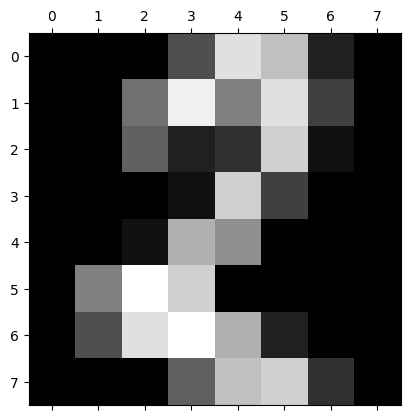

In [6]:
plt.gray()
plt.matshow(dataset.data[50].reshape(8,8))

In [7]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
x=df
y=dataset.target

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

In [12]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9611111111111111

PCA Method



In [13]:
from sklearn.decomposition import PCA
#retain 95% of information and create new dimension
pca= PCA(0.95)
x_pca=pca.fit_transform(x)

In [14]:
x_pca.shape

(1797, 29)

In [15]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [16]:
pca.n_components_

29

In [17]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2)

In [18]:
model= LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.9583333333333334

In [19]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 3)

In [20]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594])

In [21]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2)

In [22]:
model= LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.725

Heart disease Dataset


In [23]:
 df=pd.read_csv("/content/heart.csv")
 df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Treat Outliers

In [31]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [32]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [33]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [34]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [35]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [36]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [37]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [38]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [39]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [40]:
df4 = df3.copy()
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [42]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [43]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8674033149171271

Use PCA to reduce dimensions

In [47]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82465373, -29.40099458],
       [-15.58422331, -14.10909233],
       [ 83.29606634,  38.6867453 ],
       ...,
       [-67.57318721,  17.61319354],
       [ 40.70458237, -33.38750602],
       [-19.91368346, -37.29085722]])

In [48]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7348066298342542